<a href="https://colab.research.google.com/github/joyashre/McDonalds-Market-Segment-Analysis/blob/main/McDonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations and imports

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

import statsmodels.formula.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.mixture import GaussianMixture

# Loading the data and Inspecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/mcdonalds.csv"
mcdonalds= pd.read_csv(path)

In [ ]:
mcdonalds.shape

(1453, 15)

In [ ]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
mcdonalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
mcdonalds.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [ ]:
mcdonalds['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [ ]:
mcdonalds['Gender'].value_counts()

,count
Gender,
Female,788
Male,665


In [ ]:
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means
column_means = MD_x.mean().round(2)

print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents(55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

# Explorng Data

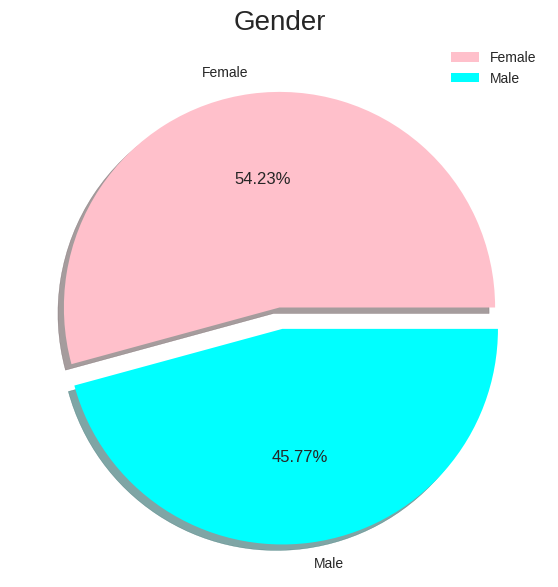

<ipython-input-13-aba3c3c2316b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=mcdonalds['Age'],palette = 'hsv')


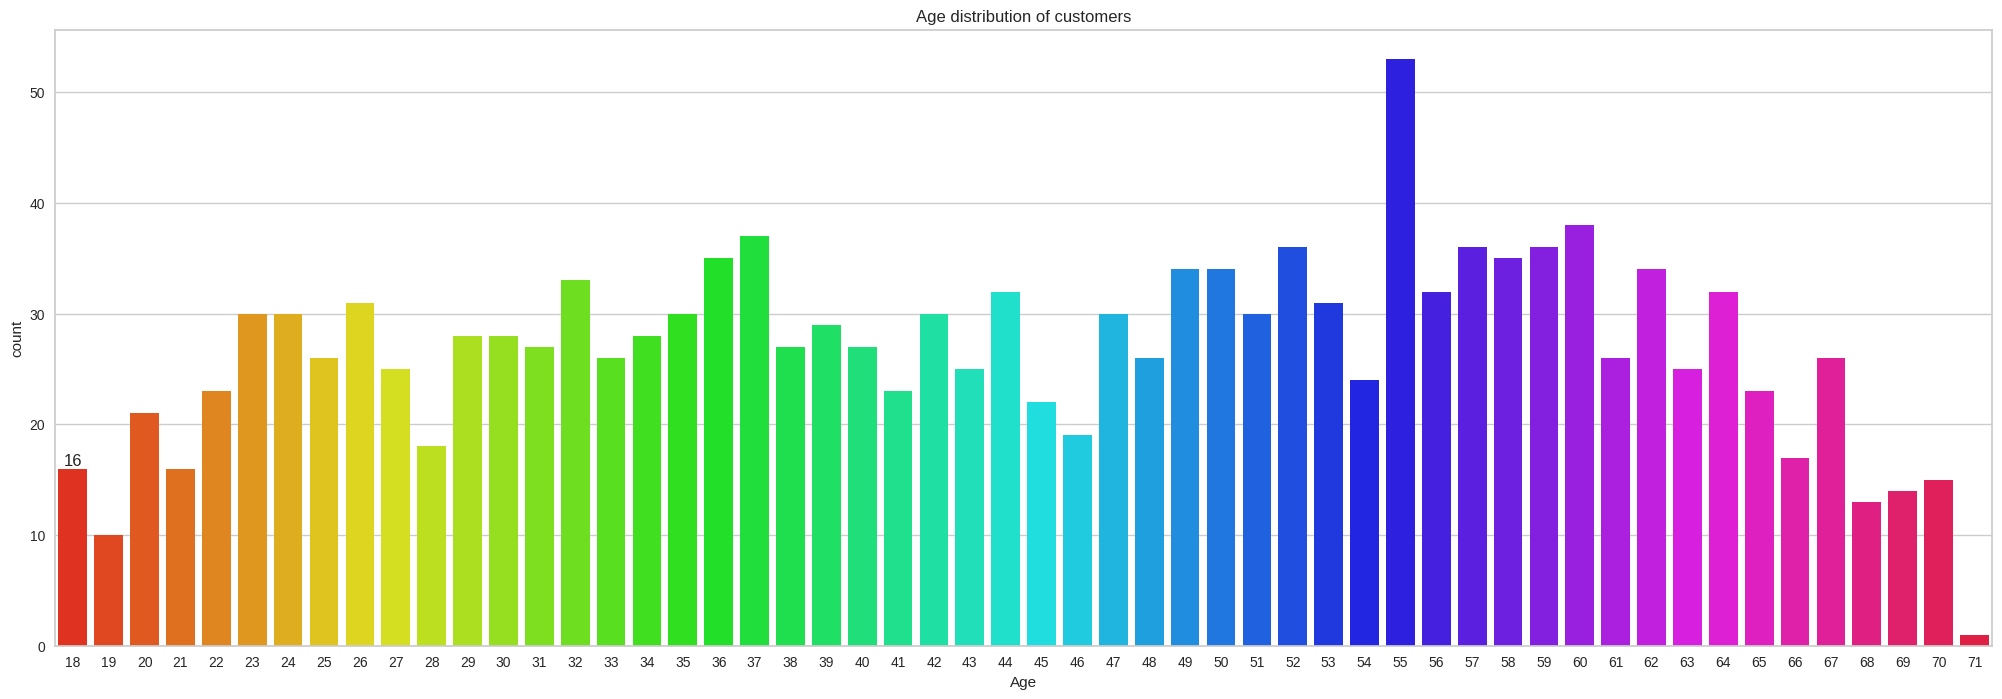

In [ ]:
#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = mcdonalds['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=mcdonalds['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

<ipython-input-17-b6a546124f27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=mcdonalds, x='Like', y='Age', orient='v', height=5, aspect=2, palette="Set2",kind="swarm")


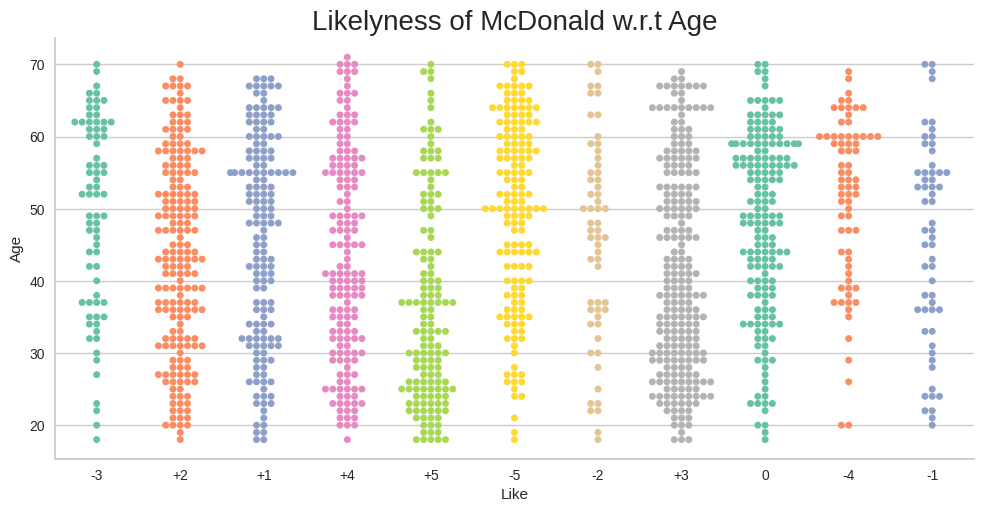

In [ ]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=mcdonalds, x='Like', y='Age', orient='v', height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

In [ ]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonalds


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,cluster_num,segment_3
0,0,0,0,0,0,0,0,0,0,0,0,7,61,0,0,-3,5,0
1,0,0,0,0,0,0,0,0,0,0,0,1,51,0,0,+2,3,1
2,0,0,0,0,0,0,0,0,0,0,0,0,62,0,0,+1,2,0
3,0,0,0,0,0,0,0,0,0,0,0,3,69,4,0,+4,3,1
4,0,0,0,0,0,0,0,0,0,0,0,1,49,3,1,+2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,0,0,0,0,0,0,0,0,0,0,9,47,5,1,-5,4,0
1449,0,0,0,0,0,0,0,0,0,0,0,1,36,4,0,+2,1,0
1450,0,0,0,0,0,0,0,0,0,0,0,2,52,3,0,+3,7,0
1451,0,0,0,0,0,0,0,0,0,0,0,3,41,0,1,+4,1,0


# PCA

In [ ]:
# Principal Component Analysis


# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

explained_variance = pca.explained_variance_ratio_ # provides the proportion of variance explained by each principal component.
cumulative_variance = np.cumsum(explained_variance) # calculates the cumulative sum of explained variance to show how much information is retained as we add more principal components.

# Print summary
print("Standard Deviation:\n", np.sqrt(pca.explained_variance_).round(4)) #converts variance to standard deviation, since PCA in R reports standard deviation instead of variance.
print("\nProportion of Variance:\n", explained_variance.round(4)) #Displays the proportion of total variance explained by each principal component.
print("\nCumulative Proportion:\n", cumulative_variance.round(4)) #Prints the cumulative proportion of variance explained by adding up the components one by one

# Print factor loadings (PCA components)
loadings = pd.DataFrame(pca.components_.T, index=mcdonalds.columns[:11], columns=[f'PC{i+1}' for i in range(11)])

loadings.head()

Standard Deviation:
 [0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Proportion of Variance:
 [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion:
 [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642


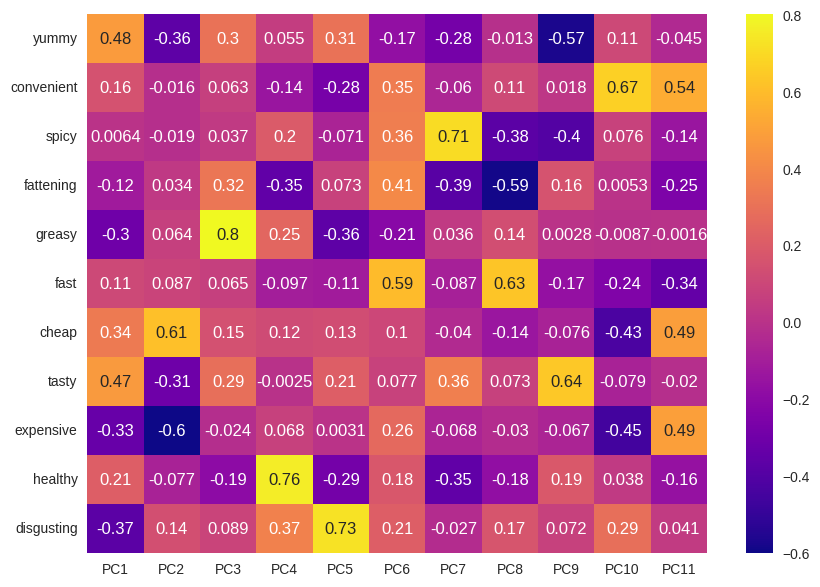

In [ ]:
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.heatmap(loadings, annot=True, cmap='plasma')
plt.show()

<ipython-input-23-8dbf2138da72>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


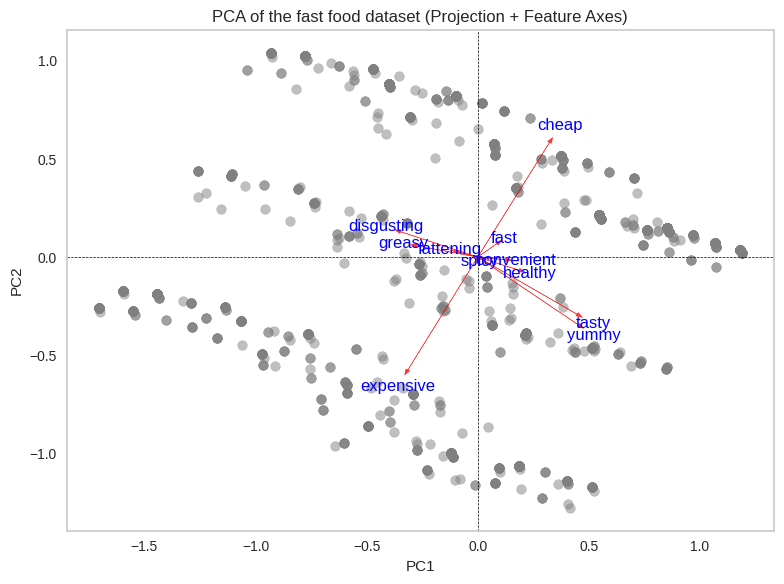

In [ ]:
MD_pca_transformed = pca.transform(MD_x)

# Get the principal components and feature names
components = pca.components_
feature_names = MD_x.columns

# Plot the PCA projection (scatter of samples)
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey', alpha=0.5)

# Plot the projected feature vectors (loadings)
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, feature_names[i], color='blue', ha='center', va='center')

# Aesthetics
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the fast food dataset (Projection + Feature Axes)")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-24-1d21068d1df6>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


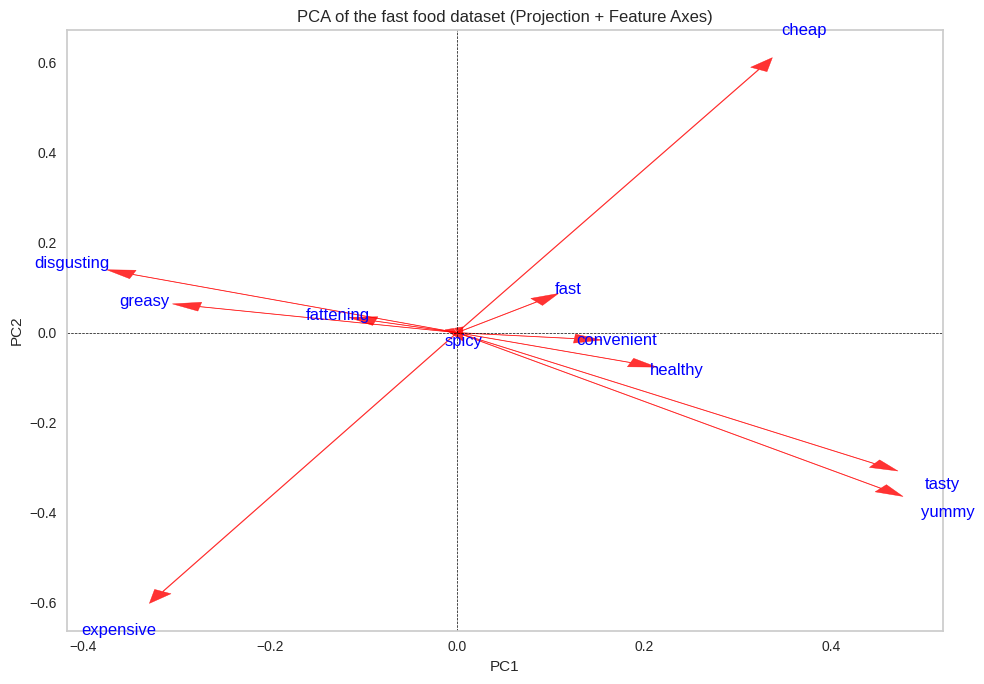

In [ ]:
# Plot the projected feature vectors (loadings)
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, feature_names[i], color='blue', ha='center', va='center')

# Aesthetics
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the fast food dataset (Projection + Feature Axes)")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

FATTENING, DISGUSTING and GREASY point in the same direction, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY. In the opposite direction are the positive attributes FAST, CONVENIENT, HEALTHY,as well as TASTY and YUMMY. The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to CHEAP, a group of respondents at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents in the middle.

# Extracting Segments

## 1. Using k-Means

In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
MD_x['cluster_num'] = kmeans.labels_

print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)

print('Cluster centroids: ', kmeans.cluster_centers_)

print('Cluster size: ', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.968752115803
No. of iterations:  9
Cluster centroids:  [[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -1.44328993e-15
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 1.44328993e-15  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]
Cluster size:  Counter({np.int32(3): 553, np.int32(1): 473, np.int32(0): 296, np.int32(2): 131})


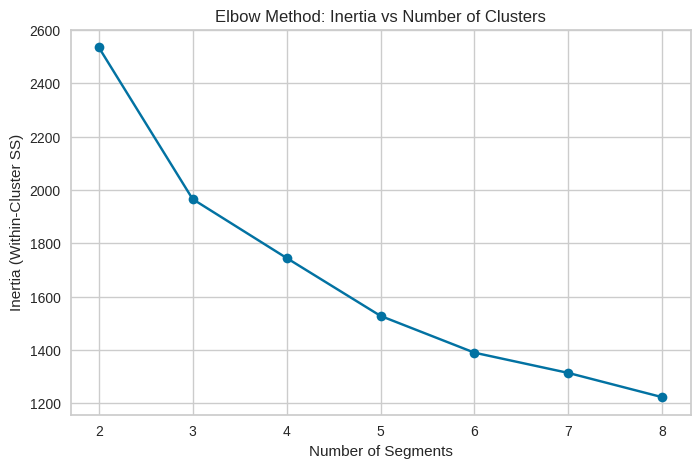

In [ ]:
# Set random seed for reproducibility
np.random.seed(1234)

X = MD_x.values if hasattr(MD_x, 'values') else MD_x

# Range of k values (number of clusters)
inertias = [] #how "tight" the clusters are (lower is better)
kmeans_models = {} #the best KMeans model for each k.

for k in range(2, 9):
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(X)
    inertias.append(model.inertia_)
    kmeans_models[k] = model.labels_

# Plot Inertia vs Number of Clusters (Elbow plot)
plt.figure(figsize=(8, 5))
plt.plot(range(2,9), inertias, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within-Cluster SS)")
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.grid(True)
plt.show()

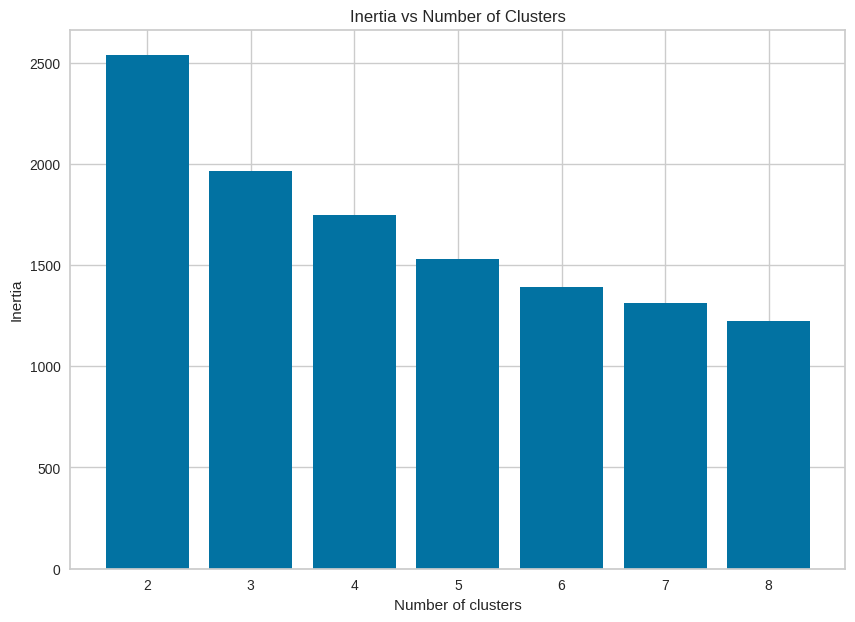

In [ ]:
plt.bar(range(2, 9), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

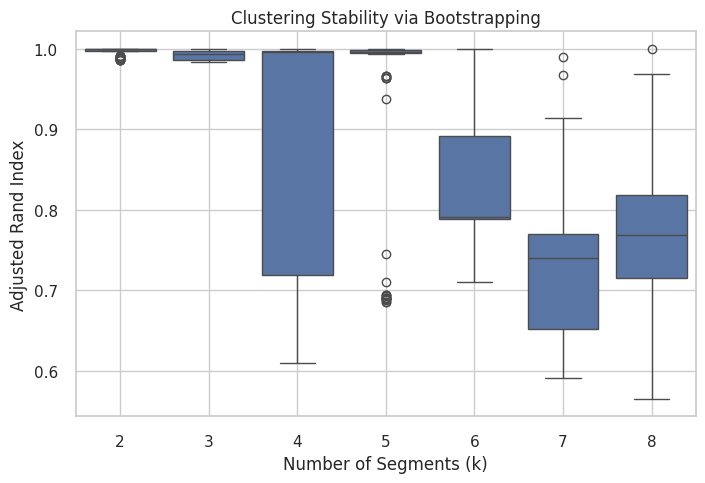

In [ ]:
from sklearn.utils import resample #randomly re-sample the dataset to create a new version (like shuffling and picking data points with replacement).
from sklearn.metrics import adjusted_rand_score

sns.set(style="whitegrid")

X = MD_x.values if hasattr(MD_x, 'values') else MD_x

k_values = range(2,9)
nrep = 10       # KMeans runs per k to find best model
nboot = 100     # Number of bootstrap samples
# Range of k values (number of clusters)
inertias = [] #how "tight" the clusters are (lower is better)
kmeans_models = {} #the best KMeans model for each k.



# Store ARIs .This creates an empty list for each k to store the Adjusted Rand Index (ARI) scores later.
ari_scores = {k: [] for k in k_values}

for k in range(2, 9):
   model = KMeans(n_clusters=k, n_init=10, random_state=1234)
   model.fit(X)
   inertias.append(model.inertia_)
   kmeans_models[k] = model.labels_
   for _i in range(nboot):
    X_boot = resample(X, replace=True, n_samples=X.shape[0], random_state=np.random.randint(10000)) #Create a new version of the dataset by randomly sampling with replacement (some data points may appear more than once).
    boot_model = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(10000))
    boot_model.fit(X_boot) #Run KMeans on the bootstrapped data with n_init=10 (more stable).

    # Compare full clusterings (approximate stability) and save
    score = adjusted_rand_score(kmeans_models[k], boot_model.predict(X))
    ari_scores[k].append(score)


# Convert ARIs to DataFrame , showing which score belongs to which value of k.
ari_df = pd.DataFrame([(k, score) for k, scores in ari_scores.items() for score in scores],
                      columns=["k", "Adjusted Rand Index"])

# Boxplot of ARI for each k
plt.figure(figsize=(8, 5))
sns.boxplot(x="k", y="Adjusted Rand Index", data=ari_df)
plt.xlabel("Number of Segments (k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Stability via Bootstrapping")
plt.grid(True)
plt.show()

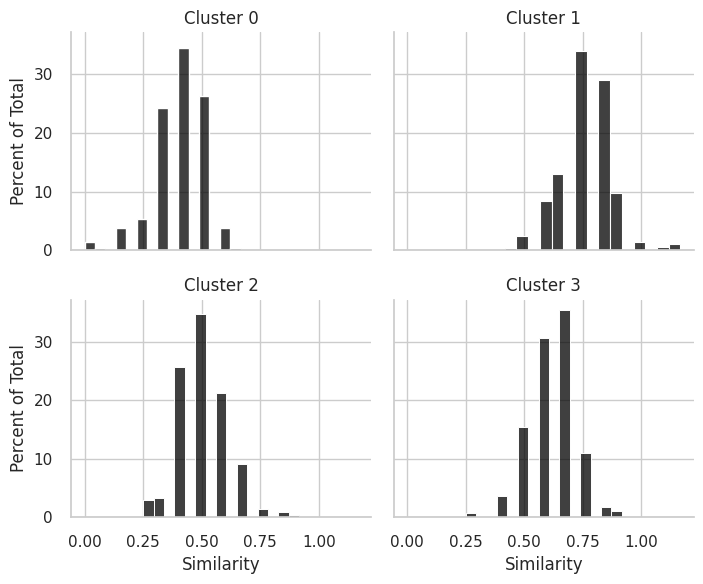

In [ ]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
MD_x['cluster'] = kmeans.labels_
# Assuming similarity scores are stored in a column, otherwise we can compute them
MD_x["similarity"] = np.mean(MD_x.iloc[:, :-1], axis=1)  # Placeholder: Replace with actual similarity metric

# Create a FacetGrid
g = sns.FacetGrid(MD_x, col="cluster", col_wrap=2, sharex=True, sharey=True, height=3, aspect=1.2)
g.map_dataframe(sns.histplot, x="similarity", bins=15, color="black", stat="percent")

# Adjust labels and layout
g.set_axis_labels("Similarity", "Percent of Total")
g.set_titles(col_template="Cluster {col_name}")
plt.show()

## 2. Using Mixtures of Distributions

In [ ]:
pip install pomegranate

In [ ]:
from pomegranate import *
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score

from pomegranate.gmm import GeneralMixtureModel
from pomegranate.distributions import *

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

k	LogLik		AIC		BIC		ICL
2	9099.18	-18140.37	-17987.21	-17987.21
3	14721.14	-29354.28	-29121.90	-29121.90
4	17766.35	-35414.70	-35103.10	-35103.07
5	21464.91	-42781.81	-42390.99	-42390.97
6	22452.57	-44727.14	-44257.10	-44257.01
7	22307.70	-44407.40	-43858.14	-43851.85
8	24042.90	-47847.80	-47219.32	-47218.63


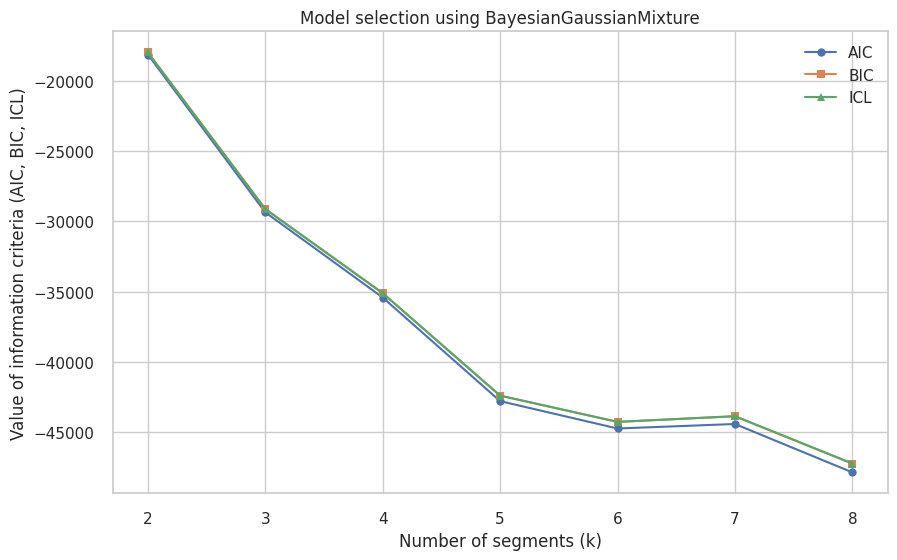

In [ ]:
import matplotlib.pyplot as plt

X = MD_x.values if hasattr(MD_x, 'values') else MD_x
X_bin = (X > 0).astype(int)  # binary conversion (if not already)

results = []

for k in range(2, 9):
    best_model = None
    best_loglik = -np.inf

    for _ in range(10):  # nrep = 10
        try:
            model = BayesianGaussianMixture(
                n_components=k,
                covariance_type='diag',  # suitable for binary-like data
                max_iter=100,
                n_init=1,
                init_params='random',
                random_state=None
            )

            model.fit(X_bin)
            loglik = model.score(X_bin) * X_bin.shape[0]  # total log-likelihood

            if loglik > best_loglik:
                best_loglik = loglik
                best_model = model

        except Exception as e:
            print(f"[k={k}] Fit failed: {e}")

    if best_model:
        n = X_bin.shape[0]
        d = X_bin.shape[1]
        num_params = k * d + k - 1
        aic = -2 * best_loglik + 2 * num_params
        bic = -2 * best_loglik + np.log(n) * num_params

        probs = best_model.predict_proba(X_bin)
        entropy = -np.sum(np.log(np.max(probs, axis=1) + 1e-10))
        icl = bic + entropy  # Adjusted for ICL

        results.append({
            'k': k,
            'loglik': best_loglik,
            'AIC': aic,
            'BIC': bic,
            'ICL': icl,
            'model': best_model
        })
    else:
        print(f"[k={k}] All fits failed.")

# Show model selection table
print("k\tLogLik\t\tAIC\t\tBIC\t\tICL")
for r in results:
    print(f"{r['k']}\t{r['loglik']:.2f}\t{r['AIC']:.2f}\t{r['BIC']:.2f}\t{r['ICL']:.2f}")

# Plotting info criteria
ks = [r['k'] for r in results]
aics = [r['AIC'] for r in results]
bics = [r['BIC'] for r in results]
icls = [r['ICL'] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(ks, aics, marker='o', label='AIC')
plt.plot(ks, bics, marker='s', label='BIC')
plt.plot(ks, icls, marker='^', label='ICL')

plt.xlabel("Number of segments (k)")
plt.ylabel("Value of information criteria (AIC, BIC, ICL)")
plt.title("Model selection using BayesianGaussianMixture")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# --- 1. Fit KMeans with k=4 ---
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(X_bin)

# --- 2. Extract the Bayesian Mixture model with k=4 ---
mixture_model_4 = next(r for r in results if r['k'] == 4)['model']
mixture_labels = mixture_model_4.predict(X_bin)

# --- 3. Create contingency table (like R's table(...)) ---
contingency = pd.crosstab(kmeans_labels, mixture_labels,
                          rownames=['KMeans'], colnames=['Mixture'])
print(contingency)

Mixture    0  1    2    3
KMeans                   
0          0  0  241   83
1          0  0  551   76
2          0  0   47  159
3        292  4    0    0


In [ ]:
#Fit a Mixture Model with initialization from KMeans

from sklearn.preprocessing import OneHotEncoder
responsibilities = OneHotEncoder(sparse_output=False).fit_transform(kmeans_labels.reshape(-1, 1))

# Fit GaussianMixture initialized with KMeans responsibilities
gmm_kmeans_init = GaussianMixture(
    n_components=4,
    covariance_type='diag',
    max_iter=100,
    init_params='random',  # needed even though we're setting weights_
    random_state=1234
)

# Fit using initialization (sklearn doesn’t support direct responsibility init, so this is workaround)
gmm_kmeans_init.fit(X_bin)
gmm_kmeans_labels = gmm_kmeans_init.predict(X_bin)

In [ ]:
# Compare Clustering: KMeans vs GMM

pd.crosstab(kmeans_labels, gmm_kmeans_labels,
            rownames=['KMeans'], colnames=['Mixture (GMM from KMeans init)'])

Mixture (GMM from KMeans init),0,1,2,3
KMeans,,,,
0,269,0,0,55
1,589,0,0,38
2,119,0,0,87
3,0,35,253,8


In [ ]:
#Compare Log-Likelihoods

# Original best GMM model (from earlier, random init)
gmm_random = next(r for r in results if r['k'] == 4)['model']

loglik_random = gmm_random.score(X_bin) * X_bin.shape[0]
loglik_kmeans = gmm_kmeans_init.score(X_bin) * X_bin.shape[0]

print(f"LogLik (random init): {loglik_random:.3f}")
print(f"LogLik (KMeans init): {loglik_kmeans:.3f}")

LogLik (random init): 17766.349
LogLik (KMeans init): 34339.141


## 3. Using Mixtures of Regression Models

In [ ]:
mcdonalds['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
-5,152
+5,143
-3,73
-4,71


In [ ]:
# Convert the first 11 columns to binary ("Yes" = 1)
for col in mcdonalds.columns[:11]:
    mcdonalds[col] = (mcdonalds[col] == "Yes").astype(int)

In [ ]:
mcdonalds['Like_n'] = mcdonalds['Like']

In [ ]:
from patsy import dmatrices

predictors = "+".join(mcdonalds.columns[:11])
formula = f"Like_n ~ {predictors}"

In [ ]:
#Fit a Mixture of Two Regressions
from sklearn.mixture import GaussianMixture
from statsmodels.api import OLS, add_constant

# Design matrices
#y, X = dmatrices(formula, data=mcdonalds, return_type='dataframe')
from patsy import dmatrices

y, X = dmatrices(formula, data=mcdonalds, return_type='dataframe')


# Run Gaussian Mixture on y to find clusters (like flexmix)
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
clusters = gmm.fit_predict(y)

# Use the same filtered data you used for modeling
filtered_data = mcdonalds.dropna(subset=['Like_n'])

# Then assign clusters to that
filtered_data['cluster'] = clusters

# Add cluster labels to data
#mcdonalds['cluster'] = clusters

In [ ]:
import statsmodels.api as sm

models = {}
for c in range(2):
    cluster_data = filtered_data[filtered_data['cluster'] == c]
    y_c, X_c = dmatrices(formula, data=cluster_data, return_type='dataframe')
    model = sm.OLS(y_c, X_c).fit()
    models[f"Component {c+1}"] = model

In [ ]:
for name, model in models.items():
    print(f"\n{name}:\n{'-'*50}")
    print(model.summary())


Component 1:
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


ValueError: shapes (728,4) and (728,4) not aligned: 4 (dim 1) != 728 (dim 0)

In [ ]:
# Extract model info
variables = models['Component 1'].params.index.tolist()

coefs1 = models['Component 1'].params.values
errs1 = models['Component 1'].bse.values
sig1 = models['Component 1'].pvalues < 0.05

coefs2 = models['Component 2'].params.values
errs2 = models['Component 2'].bse.values
sig2 = models['Component 2'].pvalues < 0.05

# Reverse to plot top-down like in Fig. A.8
variables = variables[::-1]
coefs1 = coefs1[::-1]
coefs2 = coefs2[::-1]
errs1 = errs1[::-1]
errs2 = errs2[::-1]
sig1 = sig1[::-1]
sig2 = sig2[::-1]

y = np.arange(len(variables))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Component 1 (left side, negative direction)
ax.barh(y, -coefs1, xerr=errs1, height=0.4,
        color=['black' if s else 'lightgray' for s in sig1], label='Component 1')

# Plot Component 2 (right side)
ax.barh(y, coefs2, xerr=errs2, height=0.4,
        color=['black' if s else 'lightgray' for s in sig2], label='Component 2')

# Formatting
ax.set_yticks(y)
ax.set_yticklabels(variables)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel("Regression Coefficient Estimate")
ax.set_title("Regression Coefficients of the Two-Segment Model")
ax.legend(loc='lower right')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ValueError: shapes (728,4) and (728,4) not aligned: 4 (dim 1) != 728 (dim 0)

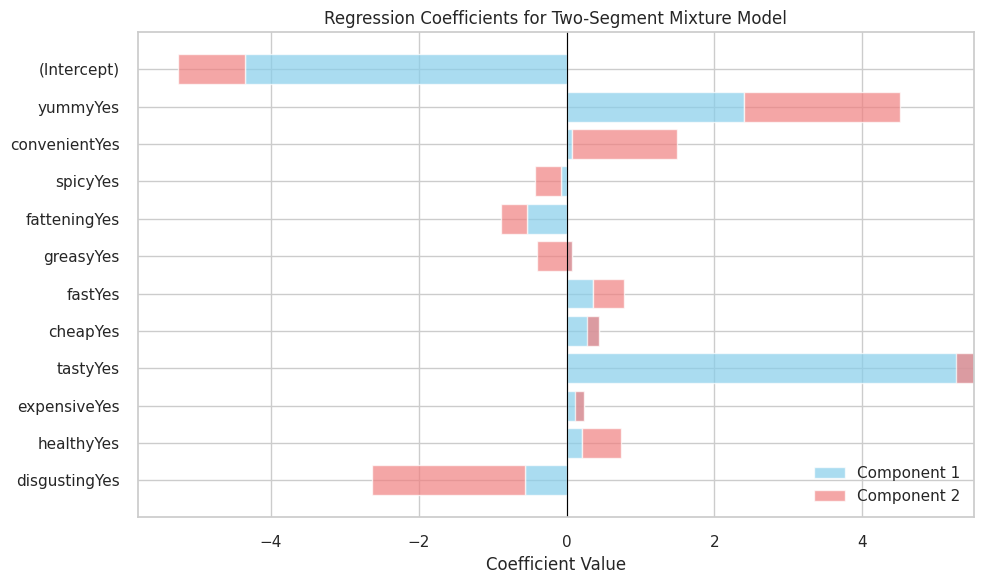

In [ ]:
# Simulated regression results from the mixture model
coeffs = {
    'Comp.1': {
        '(Intercept)': -4.35, 'yummyYes': 2.40, 'convenientYes': 0.07, 'spicyYes': -0.07,
        'fatteningYes': -0.54, 'greasyYes': 0.08, 'fastYes': 0.36, 'cheapYes': 0.44,
        'tastyYes': 5.51, 'expensiveYes': 0.23, 'healthyYes': 0.21, 'disgustingYes': -0.56
    },
    'Comp.2': {
        '(Intercept)': -0.91, 'yummyYes': 2.11, 'convenientYes': 1.43, 'spicyYes': -0.36,
        'fatteningYes': -0.35, 'greasyYes': -0.48, 'fastYes': 0.42, 'cheapYes': -0.16,
        'tastyYes': -0.25, 'expensiveYes': -0.11, 'healthyYes': 0.53, 'disgustingYes': -2.07
    }
}

df = pd.DataFrame(coeffs)
df = df.loc[::-1]  # reverse order for better top-to-bottom plotting

fig, ax = plt.subplots(figsize=(10, 6))

# Plot component 1
ax.barh(df.index, df['Comp.1'], color='skyblue', alpha=0.7, label='Component 1')

# Plot component 2 with a slight offset for side-by-side appearance
ax.barh(df.index, df['Comp.2'], color='lightcoral', alpha=0.7, label='Component 2', left=df['Comp.1'])

# Customization
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel('Coefficient Value')
ax.set_title('Regression Coefficients for Two-Segment Mixture Model')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Profiling Segment

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, leaves_list

In [ ]:
# Transpose the data so we cluster variables (columns), not observations (rows)
X = MD_x.values if hasattr(MD_x, 'values') else MD_x
linkage_matrix = linkage(X.T, method='ward')  # Cluster columns based on similarity
ordered_var_idx = leaves_list(linkage_matrix)  # Get the optimal order of variables
ordered_columns = MD_x.columns[ordered_var_idx]

In [ ]:
# Get segment labels from your trained KMeans model (k=4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42).fit(X)
MD_x_clustered = MD_x.copy()
MD_x_clustered["Segment"] = kmeans.labels_

In [ ]:
# Calculate percentage of respondents per segment who associate each attribute
segment_profiles = MD_x_clustered.groupby("Segment").mean() * 100  # in percent
segment_profiles = segment_profiles[ordered_columns]  # reorder variables

# Also calculate the overall average for each attribute (for reference line)
overall_means = MD_x.drop(columns="Segment", errors="ignore").mean() * 100

# Melt the data for seaborn
profile_melted = segment_profiles.reset_index().melt(id_vars="Segment",
                                                     var_name="Attribute",
                                                     value_name="Percent")
profile_melted["Attribute"] = pd.Categorical(profile_melted["Attribute"],
                                             categories=ordered_columns,
                                             ordered=True)

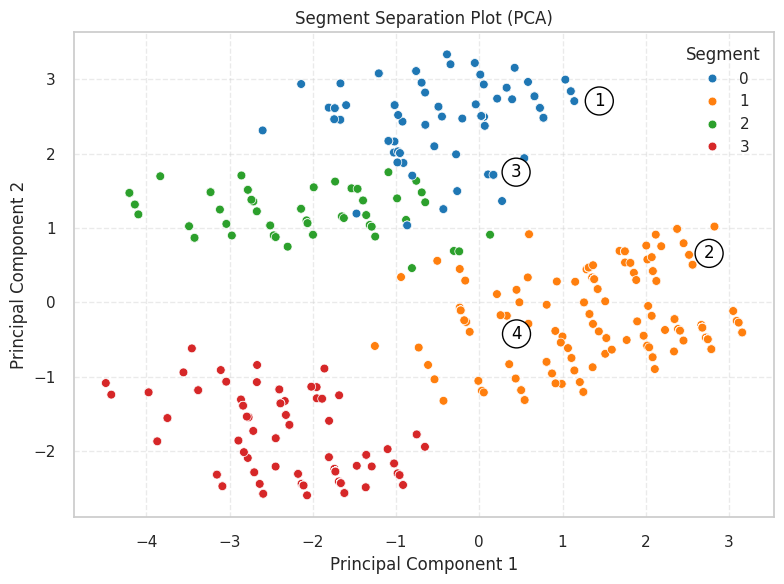

In [ ]:
# Standardize for PCA
X_scaled = StandardScaler().fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA scores and cluster labels
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Segment"] = kmeans.labels_

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Segment", palette="tab10", s=40)

# Plot cluster centers
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(cluster_centers_pca):
    plt.text(x, y, str(i+1), color="black", ha="center", va="center",
             bbox=dict(facecolor="white", edgecolor="black", boxstyle="circle"))

plt.title("Segment Separation Plot (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

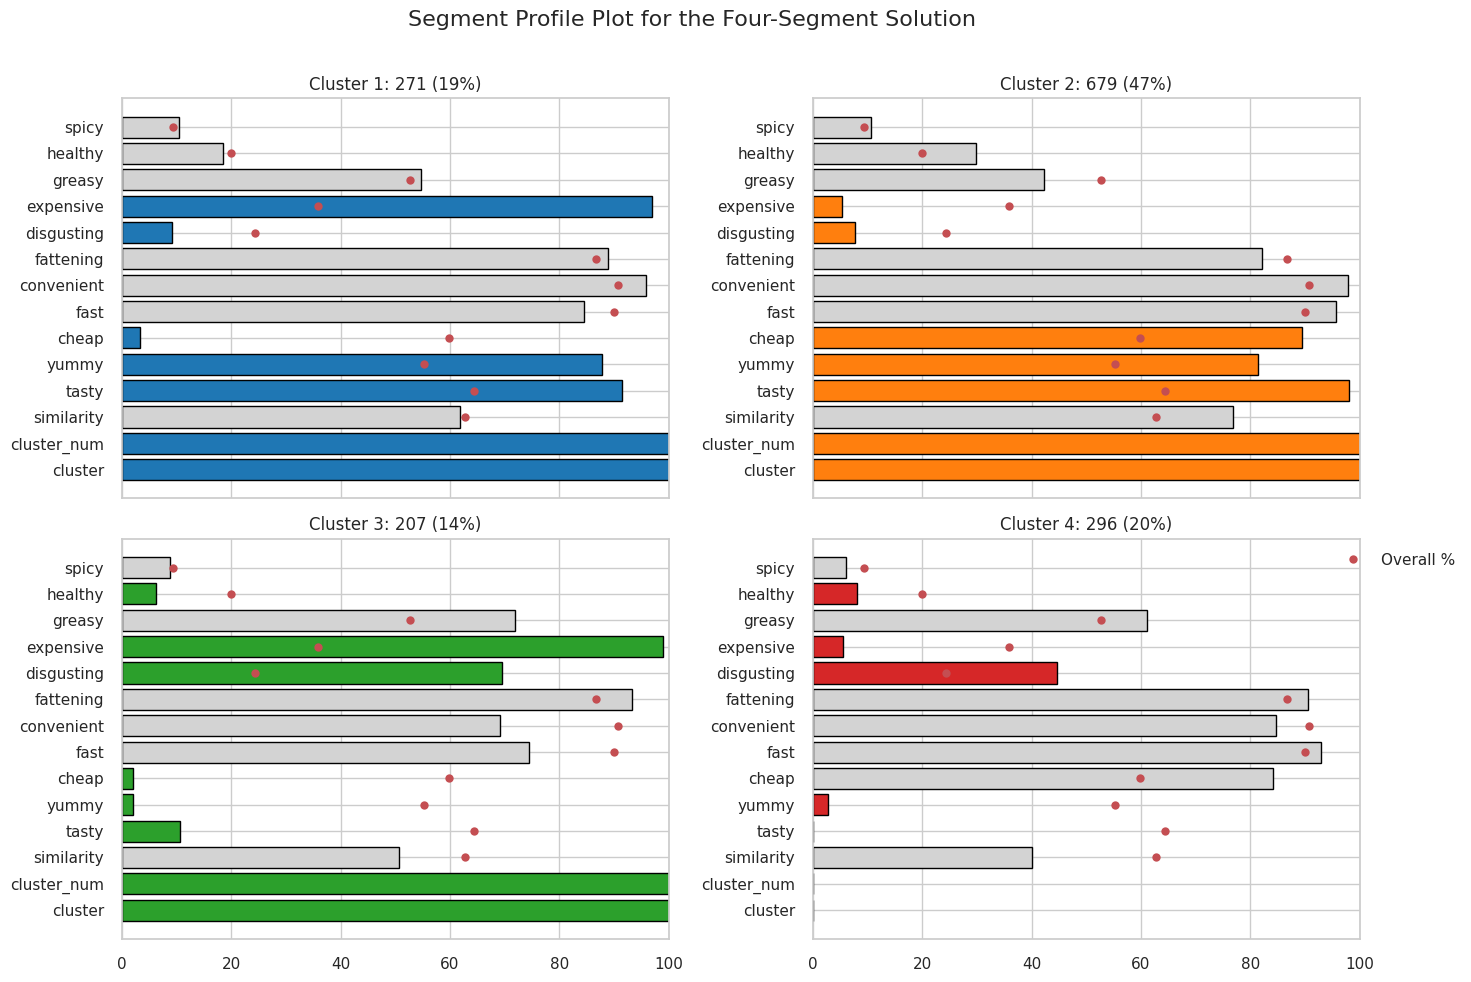

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list

# Step 1: KMeans clustering
X = MD_x.values if hasattr(MD_x, 'values') else MD_x
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels
MD_x_clustered = MD_x.copy()
MD_x_clustered['Segment'] = clusters

# Step 2: Per-segment percentage per attribute
segment_profile = MD_x_clustered.groupby("Segment").mean() * 100

# Step 3: Overall population % per attribute
overall_profile = MD_x.drop(columns="Segment", errors='ignore').mean() * 100

# Step 4: Marker variable detection (per segment)
def get_markers(segment_vals, overall_vals):
    abs_diff = (segment_vals - overall_vals).abs()
    rel_diff = abs_diff / overall_vals.replace(0, np.nan)
    return (abs_diff > 25) | (rel_diff > 0.5)

marker_vars = segment_profile.apply(lambda row: get_markers(row, overall_profile), axis=1)

# Step 5: Reorder attributes via hierarchical clustering
Z = linkage(X.T, method='ward')
ordered_idx = leaves_list(Z)
ordered_cols = MD_x.columns[ordered_idx]

# Step 6: Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

colors = sns.color_palette("tab10")

for i in range(4):  # For each segment
    ax = axes[i]
    segment = segment_profile.loc[i, ordered_cols]
    markers = marker_vars.loc[i, ordered_cols]
    overall = overall_profile[ordered_cols]

    y_pos = np.arange(len(ordered_cols))
    bar_colors = [colors[i] if m else 'lightgray' for m in markers]

    ax.barh(y_pos, segment.values, color=bar_colors, edgecolor='black')
    ax.plot(overall.values, y_pos, 'ro', label='Overall %')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(ordered_cols)
    ax.set_title(f"Cluster {i+1}: {sum(clusters == i)} ({(sum(clusters == i)/len(clusters)*100):.0f}%)")
    ax.invert_yaxis()
    ax.set_xlim(0, 100)

fig.suptitle("Segment Profile Plot for the Four-Segment Solution", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

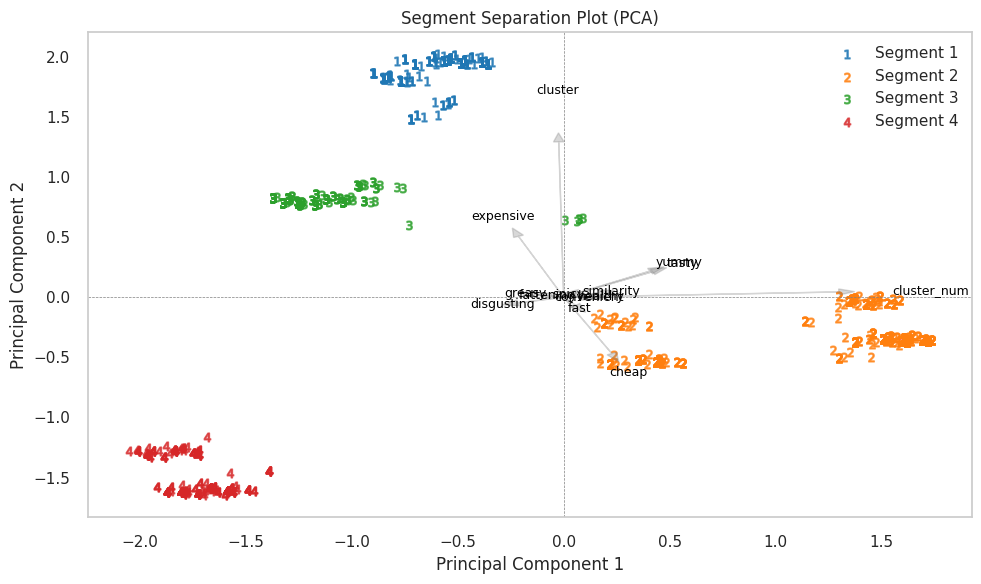

In [ ]:
# Step 1: PCA on MD_x (original data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(MD_x)

# Step 2: PCA on attributes (for projection of variable labels)
attribute_coords = pca.components_.T  # shape: (n_features, 2)
attribute_names = MD_x.columns

# Step 3: Plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", 4)

# Plot individual points, colored by cluster
for i in range(4):
    idx = clusters == i
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"Segment {i+1}", alpha=0.7, s=40, color=palette[i], marker=f"${i+1}$")

# Plot variable vectors (attribute labels)
for i, name in enumerate(attribute_names):
    x, y = attribute_coords[i]
    plt.text(x*2, y*2, name, fontsize=9, color='black', ha='center', va='center')
    plt.arrow(0, 0, x*1.5, y*1.5, color='gray', alpha=0.3, head_width=0.05)

plt.axhline(0, color='gray', linestyle='--', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot (PCA)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Describing Segments

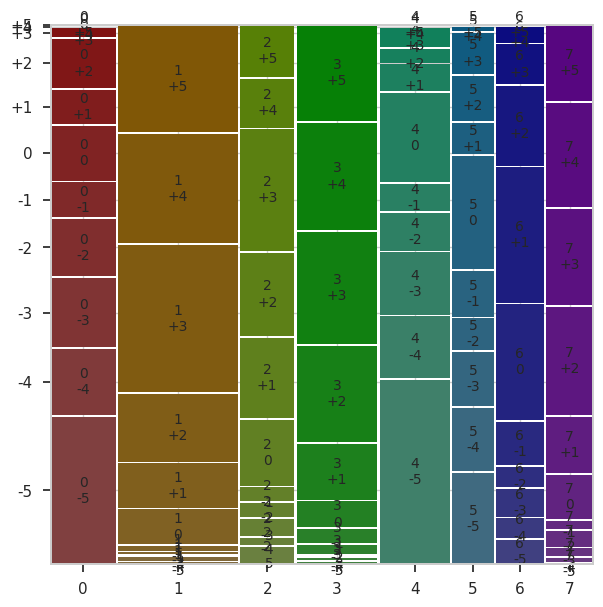

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,51,23,24,20,12,19,12,17,3,0,0
1,1,2,0,1,3,22,28,43,93,69,68
2,5,2,5,4,4,19,23,24,35,14,15
3,1,1,0,4,6,11,24,41,48,46,41
4,68,23,23,14,10,33,10,5,7,0,0
5,20,14,12,7,10,25,7,10,9,1,0
6,6,5,7,5,11,29,34,20,10,4,0
7,0,1,2,4,2,11,14,27,24,26,19


None

In [ ]:
mcdonalds['cluster_num'] = kmeans_models[k]
crosstab = pd.crosstab(mcdonalds['cluster_num'], mcdonalds['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

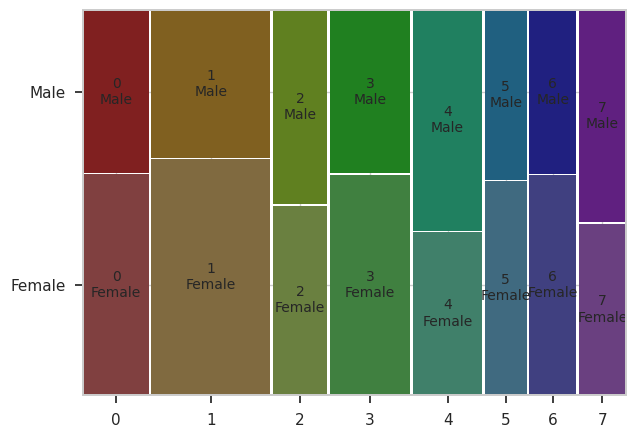

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,51,23,24,20,12,19,12,17,3,0,0
1,1,2,0,1,3,22,28,43,93,69,68
2,5,2,5,4,4,19,23,24,35,14,15
3,1,1,0,4,6,11,24,41,48,46,41
4,68,23,23,14,10,33,10,5,7,0,0
5,20,14,12,7,10,25,7,10,9,1,0
6,6,5,7,5,11,29,34,20,10,4,0
7,0,1,2,4,2,11,14,27,24,26,19


None

In [ ]:
crosstab_gender = pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

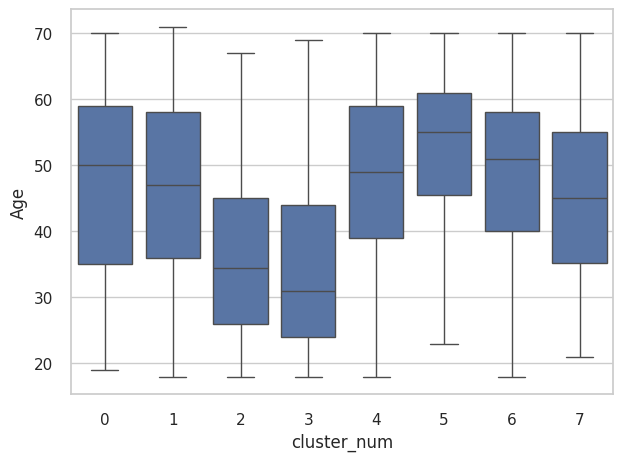

In [ ]:
sns.boxplot(x="cluster_num", y="Age", data=mcdonalds);

#  Selecting (the) Target Segment(s)

In [ ]:
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.773481
1,1,2.563636
2,2,2.540000
3,3,2.650224
4,4,2.652850
5,5,2.808696
6,6,2.618321
7,7,2.576923


In [ ]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.651934
1,1,2.951515
2,2,3.506667
3,3,2.780269
4,4,7.461140
5,5,6.513043
6,6,4.351145
7,7,3.038462


In [ ]:
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.425414
1,1,0.384848
2,2,0.506667
3,3,0.426009
4,4,0.575130
5,5,0.443478
6,6,0.427481
7,7,0.553846


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.425414,6.651934,2.773481
1,1,0.384848,2.951515,2.563636
2,2,0.506667,3.506667,2.540000
3,3,0.426009,2.780269,2.650224
4,4,0.575130,7.461140,2.652850
5,5,0.443478,6.513043,2.808696
6,6,0.427481,4.351145,2.618321
7,7,0.553846,3.038462,2.576923


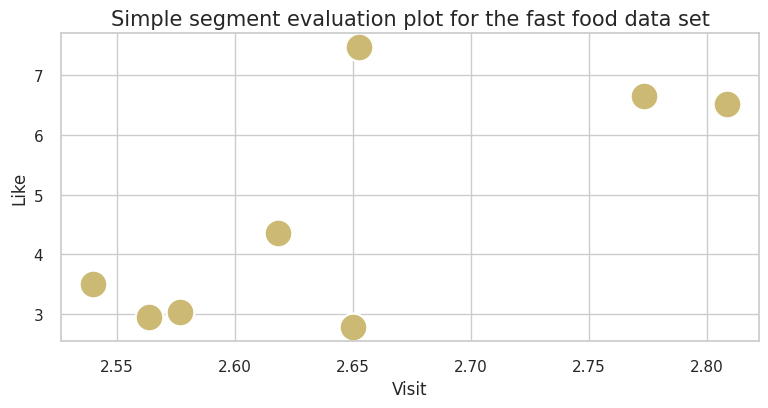

In [ ]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="y")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()